In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

data = pd.read_csv('ML/data/dataset.csv')

#Clean the Calculated B Data

nutrition_columns = [
    'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g'
]

rows_with_all_zero_nutrition = (data[nutrition_columns] == 0).all(axis=1)

data.loc[rows_with_all_zero_nutrition, 'nutriscore_grade'] = 'b'

#Drop Null Nutrigrade

data = data.dropna(subset=['nutriscore_grade'])

# Encode the target variable
label_encoder = LabelEncoder()
data['nutriscore_grade'] = label_encoder.fit_transform(data['nutriscore_grade'])

# Define features and target
X = data[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
          'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g']]
y = data['nutriscore_grade']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6606 - loss: 1.1754 - val_accuracy: 0.7399 - val_loss: 0.6600
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7753 - loss: 0.6925 - val_accuracy: 0.8252 - val_loss: 0.5530
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8592 - loss: 0.5339 - val_accuracy: 0.8680 - val_loss: 0.4646
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.4619 - val_accuracy: 0.8902 - val_loss: 0.3809
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 0.3806 - val_accuracy: 0.9047 - val_loss: 0.3630
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.3674 - val_accuracy: 0.9005 - val_loss: 0.3514
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.3505 - val_accuracy: 0.9041 - val_loss: 0.3384
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.3225 - val_accu

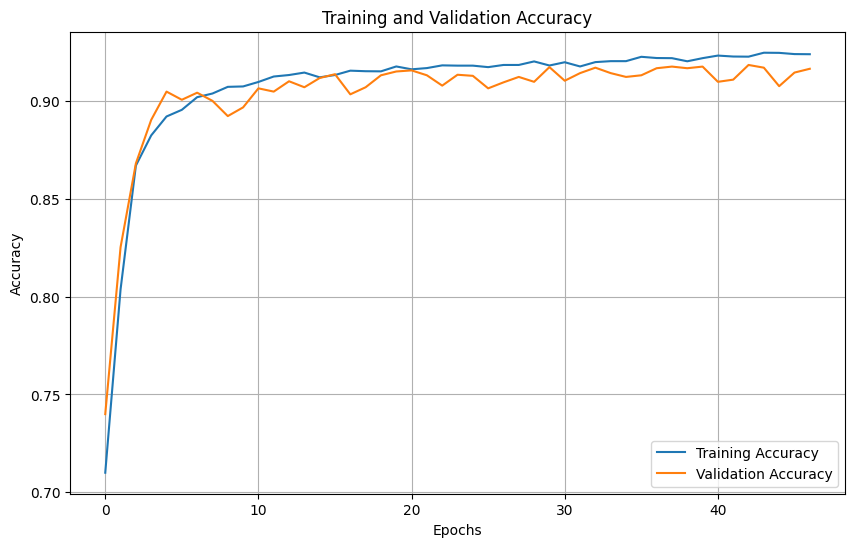

In [3]:

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with explicit shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Save the full model in .h5 format
model.save('my_model.keras')
print("Final model saved as 'final_nutriscore_model.h5'.")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('my_model.keras')

# Assume new_data is a dictionary or a pandas DataFrame with the same structure as X_train
new_data = pd.DataFrame({
    'energy-kcal_100g': [100],  # Example value
    'sugars_100g': [10],        # Example value
    'saturated-fat_100g': [2],  # Example value
    'salt_100g': [0.5],         # Example value
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [30], # Example value
    'fiber_100g': [5],          # Example value
    'proteins_100g': [3]        # Example value
})

# label_encoder = LabelEncoder()
# label_encoder.fit(data['nutriscore_grade'])  # Fit on the original labels

# Make sure to preprocess the new data (same preprocessing steps you applied to training data)
# If the input data contains NaN values, handle them as you did with the training set.
# Make sure the columns and types are the same as in the training data

# Predict the probabilities for each class
# Predict the probabilities for each class
predictions = model.predict(new_data)

for i, class_prob in enumerate(predictions[0]):
    class_label = label_encoder.inverse_transform([i])[0]
    print(f"{class_label}: {class_prob:.4f}")

# Optionally, print the predicted label with the highest probability
predicted_class_idx = np.argmax(predictions, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class_idx)
print(f"\nGrade: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
0: 0.0219
1: 0.1421
2: 0.0445
3: 0.0437
4: 0.7478

Grade: 4


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


  2%|▏         | 1/50 [00:00<00:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  4%|▍         | 2/50 [00:00<00:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


  6%|▌         | 3/50 [00:01<00:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step


  8%|▊         | 4/50 [00:01<00:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


 10%|█         | 5/50 [00:02<00:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


 12%|█▏        | 6/50 [00:02<00:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


 14%|█▍        | 7/50 [00:02<00:17,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


 16%|█▌        | 8/50 [00:03<00:17,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


 18%|█▊        | 9/50 [00:03<00:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


 20%|██        | 10/50 [00:04<00:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


 22%|██▏       | 11/50 [00:04<00:15,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


 24%|██▍       | 12/50 [00:04<00:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


 26%|██▌       | 13/50 [00:05<00:14,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 28%|██▊       | 14/50 [00:05<00:15,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


 30%|███       | 15/50 [00:06<00:14,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


 32%|███▏      | 16/50 [00:06<00:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


 34%|███▍      | 17/50 [00:07<00:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


 36%|███▌      | 18/50 [00:07<00:13,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


 38%|███▊      | 19/50 [00:07<00:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


 40%|████      | 20/50 [00:08<00:11,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


 42%|████▏     | 21/50 [00:08<00:11,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


 44%|████▍     | 22/50 [00:08<00:10,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


 46%|████▌     | 23/50 [00:09<00:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


 48%|████▊     | 24/50 [00:09<00:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


 50%|█████     | 25/50 [00:10<00:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 52%|█████▏    | 26/50 [00:10<00:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


 54%|█████▍    | 27/50 [00:11<00:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


 56%|█████▌    | 28/50 [00:11<00:08,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


 58%|█████▊    | 29/50 [00:11<00:08,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


 60%|██████    | 30/50 [00:12<00:07,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


 62%|██████▏   | 31/50 [00:12<00:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


 64%|██████▍   | 32/50 [00:12<00:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


 66%|██████▌   | 33/50 [00:13<00:06,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 68%|██████▊   | 34/50 [00:13<00:06,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


 70%|███████   | 35/50 [00:14<00:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


 72%|███████▏  | 36/50 [00:14<00:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


 74%|███████▍  | 37/50 [00:14<00:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


 76%|███████▌  | 38/50 [00:15<00:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 78%|███████▊  | 39/50 [00:15<00:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


 80%|████████  | 40/50 [00:16<00:04,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


 82%|████████▏ | 41/50 [00:16<00:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


 84%|████████▍ | 42/50 [00:17<00:03,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 86%|████████▌ | 43/50 [00:17<00:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


 88%|████████▊ | 44/50 [00:17<00:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 90%|█████████ | 45/50 [00:18<00:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


 92%|█████████▏| 46/50 [00:18<00:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 94%|█████████▍| 47/50 [00:19<00:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


 96%|█████████▌| 48/50 [00:19<00:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


 98%|█████████▊| 49/50 [00:20<00:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


100%|██████████| 50/50 [00:20<00:00,  2.43it/s]


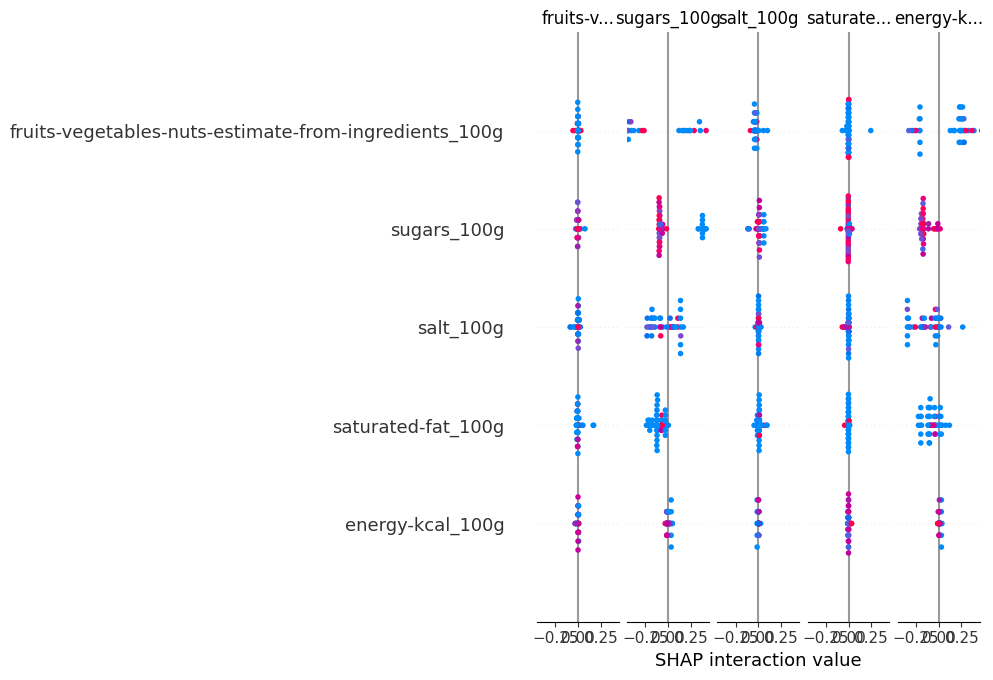

In [23]:
import shap

# Sample    K samples for prediction (adjust K as needed)
K = 50
X_subset = X_test.sample(K, random_state=42)

# Limit the background data to 20 samples
background_data = shap.sample(X_train, 50)  # Use a subset of the training data for the background

# Create SHAP explainer
explainer = shap.KernelExplainer(model.predict, background_data)

# Get SHAP values for the subset of samples
shap_values = explainer.shap_values(X_subset)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_subset)

In [24]:
import shap

# Sample K samples for prediction (adjust K as needed)
K = 50
X_subset = X_test.sample(K, random_state=42)  # Assuming X_test is your test dataset

# Limit the background data to 50 samples
background_data = shap.sample(X_train, 50)  # Assuming X_train is your training dataset

# Create SHAP explainer
explainer = shap.KernelExplainer(model.predict, background_data)

# Get SHAP values for the subset of samples
shap_values = explainer.shap_values(X_subset)

# Get the feature names from your nutrition_columns
nutrition_columns = [
    'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g'
]

# Prepare the SHAP output as a list of dictionaries
shap_output = []

for i in range(K):  # For each sample in the subset
    sample_shap_values = shap_values[i]  # SHAP values for the current sample
    
    # Create a dictionary for this sample's SHAP values
    shap_sample = {nutrition_columns[j]: sample_shap_values[j] for j in range(len(nutrition_columns))}
    
    # Append the sample's SHAP values to the output list
    shap_output.append(shap_sample)

# Example output: SHAP values for the first sample
print(shap_output[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


  2%|▏         | 1/50 [00:00<00:18,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


  4%|▍         | 2/50 [00:00<00:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


  6%|▌         | 3/50 [00:01<00:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


  8%|▊         | 4/50 [00:01<00:19,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


 10%|█         | 5/50 [00:02<00:17,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


 12%|█▏        | 6/50 [00:02<00:17,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 14%|█▍        | 7/50 [00:02<00:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


 16%|█▌        | 8/50 [00:03<00:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


 18%|█▊        | 9/50 [00:03<00:15,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 20%|██        | 10/50 [00:03<00:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


 22%|██▏       | 11/50 [00:04<00:15,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


 24%|██▍       | 12/50 [00:04<00:14,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


 26%|██▌       | 13/50 [00:05<00:14,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


 28%|██▊       | 14/50 [00:05<00:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


 30%|███       | 15/50 [00:05<00:12,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


 32%|███▏      | 16/50 [00:06<00:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


 34%|███▍      | 17/50 [00:06<00:13,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


 36%|███▌      | 18/50 [00:07<00:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


 38%|███▊      | 19/50 [00:07<00:12,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 40%|████      | 20/50 [00:07<00:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


 42%|████▏     | 21/50 [00:08<00:11,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


 44%|████▍     | 22/50 [00:08<00:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


 46%|████▌     | 23/50 [00:09<00:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


 48%|████▊     | 24/50 [00:09<00:09,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 50%|█████     | 25/50 [00:09<00:09,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


 52%|█████▏    | 26/50 [00:10<00:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


 54%|█████▍    | 27/50 [00:10<00:08,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


 56%|█████▌    | 28/50 [00:10<00:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


 58%|█████▊    | 29/50 [00:11<00:07,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


 60%|██████    | 30/50 [00:11<00:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


 62%|██████▏   | 31/50 [00:12<00:07,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step


 64%|██████▍   | 32/50 [00:12<00:06,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 66%|██████▌   | 33/50 [00:12<00:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


 68%|██████▊   | 34/50 [00:13<00:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


 70%|███████   | 35/50 [00:13<00:05,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


 72%|███████▏  | 36/50 [00:13<00:05,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


 74%|███████▍  | 37/50 [00:14<00:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


 76%|███████▌  | 38/50 [00:14<00:04,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


 78%|███████▊  | 39/50 [00:15<00:04,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


 80%|████████  | 40/50 [00:15<00:03,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


 82%|████████▏ | 41/50 [00:15<00:03,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


 84%|████████▍ | 42/50 [00:16<00:02,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


 86%|████████▌ | 43/50 [00:16<00:02,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


 88%|████████▊ | 44/50 [00:16<00:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step


 90%|█████████ | 45/50 [00:17<00:02,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 92%|█████████▏| 46/50 [00:17<00:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


 94%|█████████▍| 47/50 [00:18<00:01,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


 96%|█████████▌| 48/50 [00:18<00:00,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


 98%|█████████▊| 49/50 [00:19<00:00,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step


100%|██████████| 50/50 [00:19<00:00,  2.58it/s]

{'energy-kcal_100g': array([ 0.00667962, -0.0974977 ,  0.01332275,  0.4009611 , -0.32346576]), 'sugars_100g': array([ 0.00051503, -0.09068207, -0.11058938,  0.42007183, -0.21931541]), 'saturated-fat_100g': array([ 0.00100282, -0.0021967 , -0.00152091,  0.00057033,  0.00214448]), 'salt_100g': array([ 0.00153639,  0.00209664,  0.00464872,  0.01340956, -0.02169131]), 'fruits-vegetables-nuts-estimate-from-ingredients_100g': array([ 0.0014929 , -0.00220173, -0.00604458,  0.00527725,  0.00147617]), 'fiber_100g': array([-0.00757717, -0.00993115, -0.00886059,  0.01661874,  0.00975018]), 'proteins_100g': array([-0.01271655, -0.01463501,  0.00072167,  0.02770797, -0.00107807])}
